In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

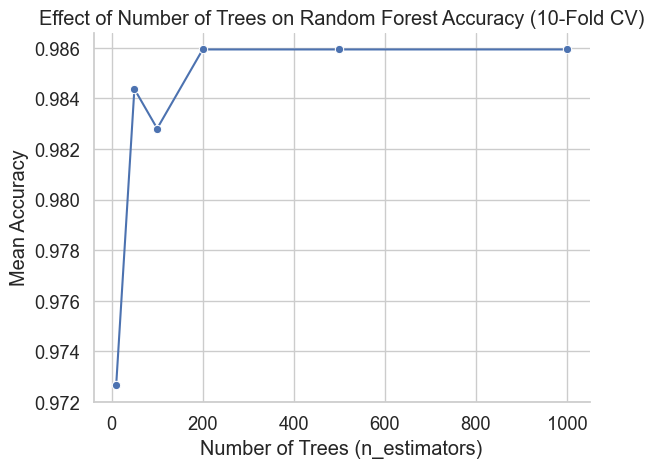

In [2]:

# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")
# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of n_estimators values to test
n_estimators_list = [10, 50, 100, 200, 500, 1000]

results = []

for n in n_estimators_list:
    # Build pipeline: vectorize text → random forest
    model = make_pipeline(
        CountVectorizer(),
        RandomForestClassifier(
            n_estimators=n,
            max_features='sqrt',     # keep fixed while varying n_estimators
            random_state=42,
            n_jobs=-1
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"n_estimators": n, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="n_estimators",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of Number of Trees on Random Forest Accuracy (10-Fold CV)")
ax.set_xlabel("Number of Trees (n_estimators)")
ax.set_ylabel("Mean Accuracy")

sns.despine()

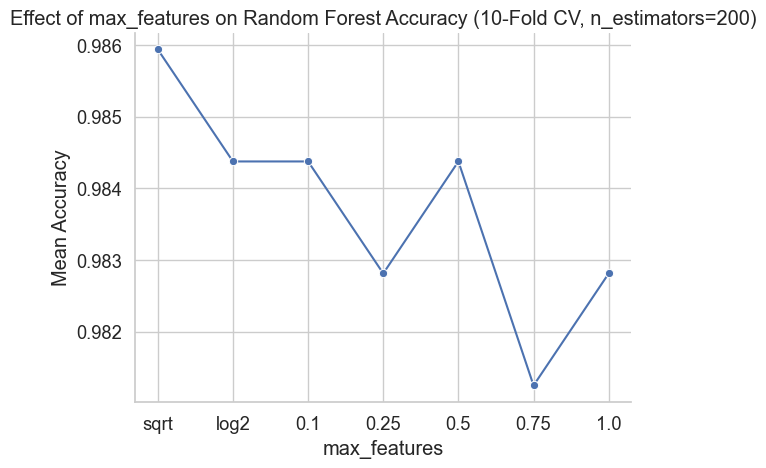

In [3]:
# Load preprocessed data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Grid of max_features to test (mix of common heuristics and fractions of features)
max_features_grid = ["sqrt", "log2", 0.1, 0.25, 0.5, 0.75, 1.0]

results = []

for mf in max_features_grid:
    # Build pipeline: vectorize text → random forest
    model = make_pipeline(
        CountVectorizer(),
        RandomForestClassifier(
            n_estimators=200,      # plateau found earlier
            max_features=mf,       # vary this
            random_state=42,
            n_jobs=-1
        )
    )

    # Evaluate with cross-validation
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({
        "max_features": mf,
        "mean_accuracy": scores.mean()
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Ensure consistent categorical ordering for plotting
order_labels = [str(mf) for mf in max_features_grid]
df_results["max_features_label"] = pd.Categorical(
    df_results["max_features"].astype(str),
    categories=order_labels,
    ordered=True
)

# Plot results
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results.sort_values("max_features_label"),
    x="max_features_label",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of max_features on Random Forest Accuracy (10-Fold CV, n_estimators=200)")
ax.set_xlabel("max_features")
ax.set_ylabel("Mean Accuracy")

sns.despine()